# Exercise - Binary Classification with Perceptron

Classify vehicle mileage as high or low based on two features, weight and horsepower using Perceptron model. High mileage is 1 and low mileage is 0.

## Perform the following operations
1. Plot the scatter of weight vs horsepower. The vehicles with high mileage should be in blue color and low should be in red color. Give appropriate legends. 
2. Split the data set into training and testing data set. Use the train_test_split function to get a 80:20 split, using random_state 3. Plot a bar chart of number of 1's and 0's in the training dataset. 
3. Use the perceptron model to classify the data, and get predictions for test dataset.
4. Obtain the confusion matrix of the output.
5. Plot the separating hyperplane on the training dataset.
6. Consider a new test data. Weight values are 2, 3.3, 1.21, 5.32, 1.23, 4.8 and horsepower 20, 29, 13, 100, 40, 49 respectively, and mileage is 0, 0, 0, 1, 1, 1, 0. Obtain the confusion matrix for this test data. 
7. Split the original dataset with 80:20 ratio again, but with random_state 299. Get the output of steps 3, 4, 5, 6. What is the difference from the previous output?

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
from io import StringIO
dataset =StringIO('''
weight,horsepower,mileage
1.4,43,1
1.5,8,0
2.71,44,1
3.55,23,0
2.5,15,0
2.9,19,0
3.85,112,1
3.96,87,1
4.62,108,1
4.7,21,0
2.67,34,1
2.5,20,0
1.932,12, 0
4.8,48,1
1.321,32,1
1.9013,52,1
4.13,19,0
2.8,29,0
''')
df = pd.read_csv(dataset)
df

,weight,horsepower,mileage
0,1.4000,43,1
1,1.5000,8,0
2,2.7100,44,1
3,3.5500,23,0
4,2.5000,15,0
5,2.9000,19,0
6,3.8500,112,1
7,3.9600,87,1
8,4.6200,108,1
9,4.7000,21,0


In [34]:
import matplotlib.pyplot as plt


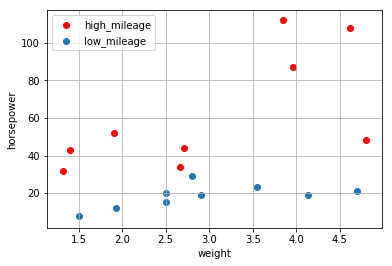

In [35]:
plt.figure()
high_mileage=df[df['mileage']==1]
low_mileage=df[df['mileage']==0]
plt.scatter(high_mileage['weight'],high_mileage['horsepower'],color='r',label='high_mileage')
plt.scatter(low_mileage['weight'],low_mileage['horsepower'],label='low_mileage')    
plt.legend()
plt.xlabel('weight')
plt.ylabel('horsepower')
plt.axis()
plt.grid()

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=\
train_test_split(df[['weight','horsepower']],df['mileage'],test_size=0.2,random_state=3)


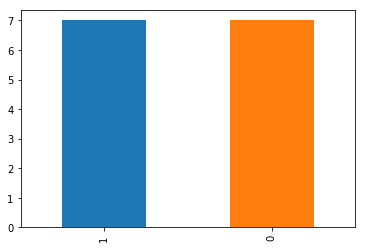

In [37]:
y_train.value_counts().plot(kind='bar')

In [50]:

from sklearn.linear_model import Perceptron

classifier=Perceptron(max_iter=1000)
model=classifier.fit(x_train,y_train)
df.head()

,weight,horsepower,mileage
0,1.40,43,1
1,1.50,8,0
2,2.71,44,1
3,3.55,23,0
4,2.50,15,0


In [39]:
prediction=model.predict(x_test)
print('obtained prediction',prediction)
print('actual prediction',y_test.tolist())

obtained prediction [0 1 0 1]
actual prediction [0, 1, 0, 1]


In [40]:
from sklearn import metrics
metrics.confusion_matrix(y_test,prediction)

array([[2, 0],
       [0, 2]], dtype=int64)

In [41]:
import seaborn as sb

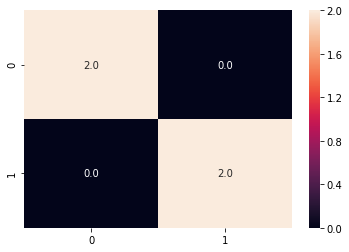

In [42]:
sb.heatmap(metrics.confusion_matrix(y_test,prediction),annot=True,fmt='.1f')

[[0.   0.01 0.02 ... 4.97 4.98 4.99]
 [0.   0.01 0.02 ... 4.97 4.98 4.99]
 [0.   0.01 0.02 ... 4.97 4.98 4.99]
 ...
 [0.   0.01 0.02 ... 4.97 4.98 4.99]
 [0.   0.01 0.02 ... 4.97 4.98 4.99]
 [0.   0.01 0.02 ... 4.97 4.98 4.99]]
[[0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e-02 1.0000e-02 1.0000e-02 ... 1.0000e-02 1.0000e-02 1.0000e-02]
 [2.0000e-02 2.0000e-02 2.0000e-02 ... 2.0000e-02 2.0000e-02 2.0000e-02]
 ...
 [1.1997e+02 1.1997e+02 1.1997e+02 ... 1.1997e+02 1.1997e+02 1.1997e+02]
 [1.1998e+02 1.1998e+02 1.1998e+02 ... 1.1998e+02 1.1998e+02 1.1998e+02]
 [1.1999e+02 1.1999e+02 1.1999e+02 ... 1.1999e+02 1.1999e+02 1.1999e+02]]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.   0.  ]
 [0.01 0.  ]
 [0.02 0.  ]
 [0.03 0.  ]
 [0.04 0.  ]
 [0.05 0.  ]
 [0.06 0.  ]
 [0.07 0.  ]
 [0.08 0.  ]
 [0.09 0.  ]
 [0.1  0.  ]
 [0.11 0.  ]
 [0.12 0.  ]
 [0.13 0.  ]
 [0.14 0.  ]
 [0.15 0.  ]
 [0.16 0.  ]
 [0.17 0.  ]
 [0.18 0. 

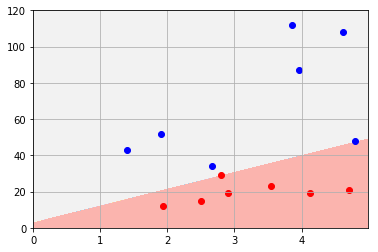

In [43]:
import numpy as np
x_train_high_mileage=x_train[y_train==1]
x_train_low_mileage=x_train[y_train==0]
x_min,x_max=0,5#minimum x/y is 0 and maximum x/y is1
y_min,y_max=0,120

xx,yy=np.meshgrid(np.arange(x_min,x_max, .01),np.arange(y_min,y_max, .01))
#storing xx ,yy with 0.2 step in every range

print(xx); print(yy);
xx_lin=xx.ravel(); print(xx_lin[:10]); #ravel converts table of array into series snd stores in xx_lin
yy_lin=yy.ravel(); print(yy_lin[:10]); #ravel converts table of array into series
pred_input=np.c_[xx_lin,yy_lin];print(pred_input[:20])#np.c combines each xx_lin value with corresponding yy_lin and stores into pred_input

z=model.predict(pred_input);print(z)#passing each table row of pred_input to predict and store in z,it gives a series of true/false values
z=z.reshape(xx.shape);print(z)#converting z from series to table of xx shape ie 25 rows and 5 columns

#contour plot requires 2 dimensional matrix
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
#input to contourf is 3 ie xx ,yy and z(where to plot true and where to plot false),cmap is from matplotlib it has 2 colours in pastel1 0for hagih value color and 1 for low valued color

plt.scatter(x_train_high_mileage['weight'],x_train_high_mileage['horsepower'],color='b',label='high_mileage')
plt.scatter(x_train_low_mileage['weight'],x_train_low_mileage['horsepower'],color='r',label='low_mileage')

plt.axis()
plt.grid()

In [44]:
from io import StringIO
new_dataset =StringIO('''
weight,horsepower,mileage
2,20,0
3.3,29,0
1.21,13,0
5.32,100,1
1.23,40,1
4.8,49,1
''')
af = pd.read_csv(new_dataset)
af.head()

,weight,horsepower,mileage
0,2.00,20,0
1,3.30,29,0
2,1.21,13,0
3,5.32,100,1
4,1.23,40,1


In [45]:
from sklearn import metrics
prediction=model.predict(af[['weight','horsepower']])
metrics.confusion_matrix(af['mileage'],prediction)

array([[3, 0],
       [0, 3]], dtype=int64)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=\
train_test_split(df[['weight','horsepower']],df['mileage'],test_size=0.2,random_state=299)

In [53]:
from sklearn.linear_model import Perceptron

classifier=Perceptron(max_iter=1000)
model=classifier.fit(x_train,y_train)
df

,weight,horsepower,mileage
0,1.4000,43,1
1,1.5000,8,0
2,2.7100,44,1
3,3.5500,23,0
4,2.5000,15,0
5,2.9000,19,0
6,3.8500,112,1
7,3.9600,87,1
8,4.6200,108,1
9,4.7000,21,0


In [54]:
from sklearn import metrics
prediction=model.predict(x_test)
metrics.confusion_matrix(y_test,prediction)

array([[1, 0],
       [1, 2]], dtype=int64)

[[0.   0.01 0.02 ... 4.97 4.98 4.99]
 [0.   0.01 0.02 ... 4.97 4.98 4.99]
 [0.   0.01 0.02 ... 4.97 4.98 4.99]
 ...
 [0.   0.01 0.02 ... 4.97 4.98 4.99]
 [0.   0.01 0.02 ... 4.97 4.98 4.99]
 [0.   0.01 0.02 ... 4.97 4.98 4.99]]
[[0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e-02 1.0000e-02 1.0000e-02 ... 1.0000e-02 1.0000e-02 1.0000e-02]
 [2.0000e-02 2.0000e-02 2.0000e-02 ... 2.0000e-02 2.0000e-02 2.0000e-02]
 ...
 [1.2997e+02 1.2997e+02 1.2997e+02 ... 1.2997e+02 1.2997e+02 1.2997e+02]
 [1.2998e+02 1.2998e+02 1.2998e+02 ... 1.2998e+02 1.2998e+02 1.2998e+02]
 [1.2999e+02 1.2999e+02 1.2999e+02 ... 1.2999e+02 1.2999e+02 1.2999e+02]]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.   0.  ]
 [0.01 0.  ]
 [0.02 0.  ]
 [0.03 0.  ]
 [0.04 0.  ]
 [0.05 0.  ]
 [0.06 0.  ]
 [0.07 0.  ]
 [0.08 0.  ]
 [0.09 0.  ]
 [0.1  0.  ]
 [0.11 0.  ]
 [0.12 0.  ]
 [0.13 0.  ]
 [0.14 0.  ]
 [0.15 0.  ]
 [0.16 0.  ]
 [0.17 0.  ]
 [0.18 0. 

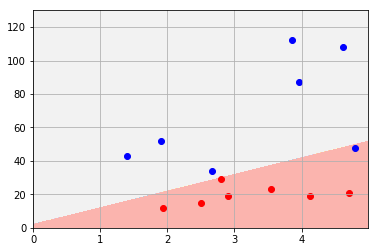

In [55]:
import numpy as np
xnew_train_high_mileage=x_train[y_train==1]
xnew_train_low_mileage=x_train[y_train==0]
x_min,x_max=0,5#minimum x/y is 0 and maximum x/y is1
y_min,y_max=0,130

xx,yy=np.meshgrid(np.arange(x_min,x_max, .01),np.arange(y_min,y_max, .01))
#storing xx ,yy with 0.2 step in every range

print(xx); print(yy);
xx_lin=xx.ravel(); print(xx_lin[:10]); #ravel converts table of array into series snd stores in xx_lin
yy_lin=yy.ravel(); print(yy_lin[:10]); #ravel converts table of array into series
pred_input=np.c_[xx_lin,yy_lin];print(pred_input[:20])#np.c combines each xx_lin value with corresponding yy_lin and stores into pred_input

z=model.predict(pred_input);print(z)#passing each table row of pred_input to predict and store in z,it gives a series of true/false values
z=z.reshape(xx.shape);print(z)#converting z from series to table of xx shape ie 25 rows and 5 columns

#contour plot requires 2 dimensional matrix
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
#input to contourf is 3 ie xx ,yy and z(where to plot true and where to plot false),cmap is from matplotlib it has 2 colours in pastel1 0for hagih value color and 1 for low valued color

plt.scatter(x_train_high_mileage['weight'],x_train_high_mileage['horsepower'],color='b',label='high_mileage')
plt.scatter(x_train_low_mileage['weight'],x_train_low_mileage['horsepower'],color='r',label='low_mileage')

plt.axis()
plt.grid()